# Given Spotify’s annual top 100 song charts, is there a marked preference for songs with specific features/metrics among Spotify users?

In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
# import csv
csvfile = "datasets/top2018.csv"
df = pd.read_csv(csvfile)
df

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.5520,0.3570,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.4730,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.1310,0.1400,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.1120,0.4390,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.3960,0.3500,91.030,217925.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars,Zac Efron,0.684,0.619,10.0,-7.005,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,125.046,217440.0,4.0
96,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,3.0,-6.318,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,105.076,205748.0,4.0
97,5WvAo7DNuPRmk4APhdPzi,No Brainer,DJ Khaled,0.552,0.760,0.0,-4.706,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,135.702,260000.0,5.0
98,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,11.0,-6.593,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,180.043,239000.0,4.0


In [35]:
# select revelant columns
# dropping key and time_signature because of low variance
# and acousticness and liveness because they are not pertinent to the question
cols_to_drop = ["id", "key", "time_signature", "acousticness", "liveness"]
df_light = df.drop(cols_to_drop, axis=1)
df_light

,name,artists,danceability,energy,loudness,mode,speechiness,instrumentalness,valence,tempo,duration_ms
0,God's Plan,Drake,0.754,0.449,-9.211,1.0,0.1090,0.000083,0.3570,77.169,198973.0
1,SAD!,XXXTENTACION,0.740,0.613,-4.880,1.0,0.1450,0.003720,0.4730,75.023,166606.0
2,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,-6.090,0.0,0.0898,0.000066,0.1400,159.847,218147.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,-8.011,1.0,0.1170,0.000000,0.4390,140.124,221440.0
4,In My Feelings,Drake,0.835,0.626,-5.833,1.0,0.1250,0.000060,0.3500,91.030,217925.0
...,...,...,...,...,...,...,...,...,...,...,...
95,Rewrite The Stars,Zac Efron,0.684,0.619,-7.005,1.0,0.0386,0.000000,0.2840,125.046,217440.0
96,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,-6.318,1.0,0.0456,0.000004,0.3300,105.076,205748.0
97,No Brainer,DJ Khaled,0.552,0.760,-4.706,1.0,0.3420,0.000000,0.6390,135.702,260000.0
98,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,-6.593,0.0,0.0390,0.000001,0.0967,180.043,239000.0


In [36]:
# calculate averages of each metric
stats = df_light.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
danceability,100.0,0.716460,0.131070,0.2580,0.63550,0.73300,0.798250,0.964
energy,100.0,0.659060,0.145067,0.2960,0.56200,0.67800,0.772250,0.909
loudness,100.0,-5.677640,1.777577,-10.1090,-6.65050,-5.56650,-4.363750,-2.384
mode,100.0,0.590000,0.494311,0.0000,0.00000,1.00000,1.000000,1.000
speechiness,100.0,0.115569,0.104527,0.0232,0.04535,0.07495,0.137000,0.530
instrumentalness,100.0,0.001584,0.013449,0.0000,0.00000,0.00000,0.000031,0.134
valence,100.0,0.484443,0.206145,0.0796,0.34100,0.47050,0.641500,0.931
tempo,100.0,119.904180,28.795984,64.9340,95.73075,120.11600,140.022750,198.075
duration_ms,100.0,205206.780000,40007.893404,95467.0000,184680.00000,205047.50000,221493.250000,417920.000


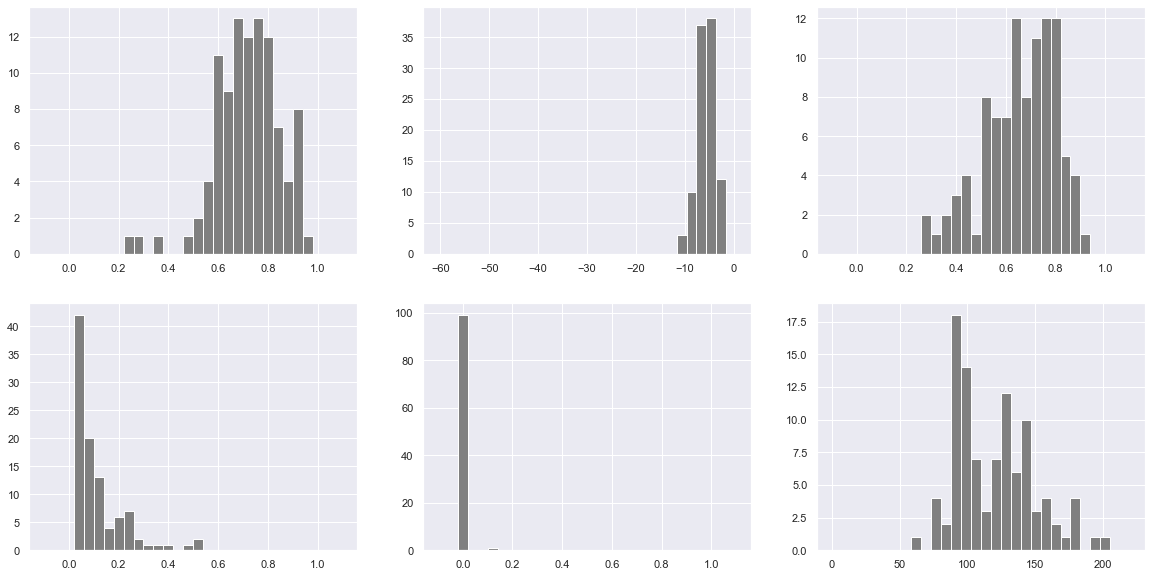

In [37]:
df_light = df_light.sort_values(by=["danceability"])

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs[0, 0].hist(df_light['danceability'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[0, 1].hist(df_light['loudness'], 30, range=[-60.5, 0.5], facecolor='gray', align='mid')
axs[0, 2].hist(df_light['energy'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 0].hist(df_light['speechiness'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 1].hist(df_light['instrumentalness'], 30, range=[-0.1, 1.1], facecolor='gray', align='mid')
axs[1, 2].hist(df_light['tempo'], 30, range=[0, 220], facecolor='gray', align='mid')
plt.show()


## Conclusions:

- **Danceability:**
Scale 0-1: mean=0.71 with std=0.13.
More danceable is preferred.

- **Loudness:**
Scale -60-0: mean=-6 with std=1.7.
Louder is preferred.

- **Energy:**
Scale 0-1: mean=0.65 with std=0.14.
Neither excessive nor lacking energy is preferred.

- **Speechiness:**
Scale 0-1 (songs usually within the 0-0.66 range): mean=0.11 with std=0.1.
Less speechiness is preferred (p.e.: rap would be 0.33-0.66).

- **Instrumentalness:**
Scale 0-1 (instrumental only is usually >0.5): mean=0.001 with std=0.01.
Songs with vocals are definitely preferred.

- **Tempo:**
Usually 20-200: mean=119.
Songs in the _allegro_ region of tempo are preferred (not too fast but not slow).

- **Valence:**
Scale 0-1: mean=0.48 with std=0.2.
Both positive- and negative-sounding songs are equally preferred.

- **Mode:**
Scale 0-1: mean 0.59 with std=0.49.
Both major and minor modes are equally preferred, confirming valence data.


In [27]:
# calculate averages of each metric per artist, excluding outliers

# identify outliers
stats['IQR'] = stats['75%']-stats['25%']
outliers = pd.DataFrame(columns=df_light.columns)
for col in stats.index:
    iqr = stats.at[col, 'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col, '25%'] - cutoff
    upper = stats.at[col, '75%'] + cutoff
    results = df_light[(df_light[col]<lower)|(df_light[col]>upper)].copy()
    results['outlier'] = col
    outliers = outliers.append(results)


# get averages, excluding outliers
df_avg = df_light[(df_light["artists"]!="Billie Eilish") & (df_light["artists"]!="Keala Settle") & (df_light["artists"]!="ZAYN")].copy()
danceability_avg = df_avg["danceability"].mean()
energy_avg = df_avg["energy"].mean()
loudness_avg = df_avg["loudness"].mean()
tempo_avg = df_avg["tempo"].mean()

print(danceability_avg, energy_avg, loudness_avg, tempo_avg)
outliers
# Outliers stand out especially for their unusually low value for danceability.

0.7294123711340206 0.6646288659793815 -5.606041237113403 118.59163917525774


,artists,danceability,duration_ms,energy,instrumentalness,loudness,mode,name,outlier,speechiness,tempo,valence
98,ZAYN,0.258,239000.0,0.437,0.000001,-6.593,0.0,Dusk Till Dawn - Radio Edit,danceability,0.0390,180.043,0.0967
93,Keala Settle,0.284,234707.0,0.704,0.000115,-7.276,1.0,This Is Me,danceability,0.1860,191.702,0.1000
80,Billie Eilish,0.351,200186.0,0.296,0.000000,-10.109,0.0,lovely (with Khalid),danceability,0.0333,115.284,0.1200
80,Billie Eilish,0.351,200186.0,0.296,0.000000,-10.109,0.0,lovely (with Khalid),loudness,0.0333,115.284,0.1200
97,DJ Khaled,0.552,260000.0,0.760,0.000000,-4.706,1.0,No Brainer,speechiness,0.3420,135.702,0.6390
35,benny blanco,0.560,173800.0,0.680,0.000000,-7.648,0.0,Eastside (with Halsey & Khalid),speechiness,0.3210,89.391,0.3190
23,5 Seconds of Summer,0.596,203418.0,0.854,0.000000,-5.114,0.0,Youngblood,speechiness,0.4630,120.274,0.1520
40,Eminem,0.748,221013.0,0.749,0.000000,-5.916,0.0,River (feat. Ed Sheeran),speechiness,0.5160,90.090,0.6590
55,6ix9ine,0.931,179405.0,0.387,0.000000,-9.127,1.0,FEFE (feat. Nicki Minaj & Murda Beatz),speechiness,0.4120,125.978,0.3760
91,Lil Baby,0.964,142273.0,0.346,0.000000,-9.309,0.0,Yes Indeed,speechiness,0.5300,119.958,0.5620


In [28]:
# calculate relative distances to mean for each metric and adding them to see which 10 artists are closer to the mean
df_light["dist_danceability"] = abs((df_light["danceability"] - danceability_avg)/danceability_avg)
df_light["dist_energy"] = abs((df_light["energy"] - energy_avg)/energy_avg)
df_light["dist_loudness"] = abs((df_light["loudness"] - loudness_avg)/loudness_avg)
df_light["dist_tempo"] = abs((df_light["tempo"] - tempo_avg)/tempo_avg)

# sum distances
df_light["diff"] = df_light["dist_danceability"] + df_light["dist_energy"] + df_light["dist_loudness"] + df_light["dist_tempo"]
df_light.sort_values(by=["diff"], ascending=False, inplace=True)

df_light

,name,artists,danceability,energy,loudness,mode,speechiness,instrumentalness,valence,tempo,duration_ms,dist_danceability,dist_energy,dist_loudness,dist_tempo,diff
80,lovely (with Khalid),Billie Eilish,0.351,0.296,-10.109,0.0,0.0333,0.000000,0.1200,115.284,200186.0,0.518791,0.554639,0.803233,0.027891,1.904554
38,changes,XXXTENTACION,0.669,0.308,-10.068,1.0,0.0290,0.000000,0.5200,64.934,121887.0,0.082823,0.536583,0.795920,0.452457,1.867784
98,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,-6.593,0.0,0.0390,0.000001,0.0967,180.043,239000.0,0.646291,0.342490,0.176053,0.518176,1.683010
93,This Is Me,Keala Settle,0.284,0.704,-7.276,1.0,0.1860,0.000115,0.1000,191.702,234707.0,0.610645,0.059238,0.297886,0.616488,1.584257
91,Yes Indeed,Lil Baby,0.964,0.346,-9.309,0.0,0.5300,0.000000,0.5620,119.958,142273.0,0.321612,0.479409,0.660530,0.011522,1.473072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,In My Mind,Dynoro,0.694,0.770,-5.335,1.0,0.1490,0.000011,0.1630,125.905,184560.0,0.048549,0.158541,0.048348,0.061668,0.317107
72,Pray For Me (with Kendrick Lamar),The Weeknd,0.735,0.677,-4.979,1.0,0.0930,0.000022,0.1880,100.584,211440.0,0.007660,0.018614,0.111851,0.151846,0.289971
26,Love Lies (with Normani),Khalid,0.708,0.648,-5.626,1.0,0.0449,0.000000,0.3380,143.955,201707.0,0.029356,0.025020,0.003560,0.213871,0.271807
24,New Rules,Dua Lipa,0.762,0.700,-6.021,0.0,0.0694,0.000016,0.6080,116.073,209320.0,0.044677,0.053219,0.074020,0.021238,0.193154


In [29]:
# which 5 artists have a greater presence in the top chart?
# (index 6 onwards has only 2 songs on the list)
df_top5_popular = df_light.groupby("artists", as_index=False).agg({"name":"count"})
df_top5_popular = df_top5_popular.sort_values(by=["name"], ascending=False).head(5)
top5_popular = list(df_top5_popular["artists"])
top5_popular

['Post Malone', 'XXXTENTACION', 'Drake', 'Ed Sheeran', 'Marshmello']

In [32]:
# what characteristics do these artists' songs have that might make them more appealing?

stats2 = df_light[(df_light["artists"].isin(top5_popular))].describe()

df_light[(df_light["artists"].isin(top5_popular))]

,name,artists,danceability,energy,loudness,mode,speechiness,instrumentalness,valence,tempo,duration_ms,dist_danceability,dist_energy,dist_loudness,dist_tempo,diff
38,changes,XXXTENTACION,0.669,0.308,-10.068,1.0,0.0290,0.000000,0.520,64.934,121887.0,0.082823,0.536583,0.795920,0.452457,1.867784
61,Nonstop,Drake,0.912,0.412,-8.074,1.0,0.1240,0.013000,0.422,154.983,238614.0,0.250322,0.380105,0.440232,0.306863,1.377521
28,Jocelyn Flores,XXXTENTACION,0.872,0.391,-9.144,0.0,0.2420,0.000004,0.437,134.021,119133.0,0.195483,0.411702,0.631098,0.130105,1.368387
0,God's Plan,Drake,0.754,0.449,-9.211,1.0,0.1090,0.000083,0.357,77.169,198973.0,0.033709,0.324435,0.643049,0.349288,1.350481
84,Perfect Duet (Ed Sheeran & Beyonc?),Ed Sheeran,0.587,0.299,-7.365,1.0,0.0263,0.000000,0.356,94.992,259550.0,0.195243,0.550125,0.313761,0.198999,1.258128
9,FRIENDS,Marshmello,0.626,0.880,-2.384,0.0,0.0504,0.000000,0.534,95.079,202621.0,0.141775,0.324047,0.574744,0.198266,1.238832
62,Fuck Love (feat. Trippie Redd),XXXTENTACION,0.797,0.533,-9.740,0.0,0.0412,0.000152,0.329,131.036,146520.0,0.092660,0.198049,0.737411,0.104935,1.133055
64,Silence,Marshmello,0.520,0.761,-3.093,1.0,0.0853,0.000005,0.286,141.971,180823.0,0.287097,0.145000,0.448274,0.197142,1.077513
12,Nice For What,Drake,0.586,0.909,-6.474,1.0,0.0705,0.000109,0.757,93.394,210747.0,0.196614,0.367681,0.154826,0.212474,0.931594
51,Happier,Marshmello,0.687,0.792,-2.749,1.0,0.0452,0.000000,0.671,100.015,214290.0,0.058146,0.191642,0.509636,0.156644,0.916068


In [34]:
stats2

,danceability,energy,loudness,mode,speechiness,instrumentalness,valence,tempo,duration_ms,dist_danceability,dist_energy,dist_loudness,dist_tempo,diff
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.705727,0.583318,-6.217182,0.636364,0.085882,0.000966,0.462045,117.943409,197608.454545,0.136525,0.234892,0.325701,0.227000,0.924117
std,0.117063,0.169016,2.251332,0.492366,0.054067,0.002917,0.193670,31.001464,46966.368744,0.085643,0.150159,0.250184,0.119941,0.367527
min,0.520000,0.299000,-10.068000,0.000000,0.023200,0.000000,0.140000,64.934000,95467.000000,0.006289,0.015992,0.020863,0.038404,0.475771
25%,0.605750,0.470000,-7.849500,0.000000,0.042200,0.000000,0.351500,95.006500,170160.250000,0.071170,0.146978,0.096228,0.162875,0.647611
50%,0.683500,0.561000,-6.017000,1.000000,0.080300,0.000003,0.437500,125.577500,216107.500000,0.139033,0.193535,0.287094,0.198755,0.826828
75%,0.786250,0.653500,-5.012000,1.000000,0.122250,0.000079,0.530500,141.509250,226486.500000,0.195423,0.325563,0.494296,0.288249,1.212388
max,0.921000,0.909000,-2.384000,1.000000,0.242000,0.013000,0.931000,180.024000,263400.000000,0.287097,0.550125,0.795920,0.518016,1.867784
